In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import seaborn as sns

from pandas.plotting import parallel_coordinates


In [2]:
# !pip install mlxtend
#https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

In [2]:
df = pd.read_csv("tel_samp_rec.csv",encoding="latin-1")

In [3]:
df.head()

,Defence.date,Domains,Full.Text.Language,def.date,n.disc,these.id,disc1.lev1,disc1.lev2,disc1.lev3,disc2.lev1,...,n.tag,disc1.rec.lev1,disc1.rec.lev2,disc1.rec.lev3,disc2.rec.lev1,disc2.rec.lev2,disc2.rec.lev3,disc3.rec.lev1,disc3.rec.lev2,disc3.rec.lev3
0,2010/09/23,"Sciences du Vivant [q-bio] / Ecologie, Environ...",French,2010.0,1,tel-00662843v1,Sciences du Vivant [q-bio],"Ecologie, Environnement",Ecosystèmes,NaN,...,1,X,67 - Biologie des populations et écologie,"Ecologie, Environnement",NaN,NaN,NaN,NaN,NaN,NaN
1,2009/11/02,Sciences de l'Homme et Société,French,2009.0,1,tel-00491490v1,Sciences de l'Homme et Société,NaN,NaN,NaN,...,1,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996/05/30,Sciences du Vivant [q-bio] / Alimentation et N...,French,1996.0,1,tel-01776364v1,Sciences du Vivant [q-bio],Alimentation et Nutrition,NaN,Sciences du Vivant [q-bio],...,2,X,68 - Biologie des organismes,Alimentation et Nutrition,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/02/02,Informatique [cs] / Autre [cs.OH] \r\n\r\nInf...,French,2018.0,1,tel-02437294v1,Informatique [cs],Autre [cs.OH],NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
4,2015/07/08,Informatique [cs] / Automatique \r\n\r\nInfor...,French,2015.0,1,tel-01245100v1,Informatique [cs],Automatique,NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN


In [4]:
cols = ['disc1.rec.lev1','disc2.rec.lev1','disc3.rec.lev1']
#subset columns shown above and take columns where all the 3 columns are not null
df_sub = df[df[cols].notnull().all(axis=1)]

In [5]:
df_sub.head()

,Defence.date,Domains,Full.Text.Language,def.date,n.disc,these.id,disc1.lev1,disc1.lev2,disc1.lev3,disc2.lev1,...,n.tag,disc1.rec.lev1,disc1.rec.lev2,disc1.rec.lev3,disc2.rec.lev1,disc2.rec.lev2,disc2.rec.lev3,disc3.rec.lev1,disc3.rec.lev2,disc3.rec.lev3
53,1985/10/28,Planète et Univers [physics] / Sciences de la ...,French,1985.0,2,tel-00711880v1,Planète et Univers [physics],Sciences de la Terre,Tectonique,Sciences de l'environnement,...,3,VIII,35-36 - 2 sections - Sciences de la Terre,Sciences de la Terre,VIII,"37 - Météorologie, océanographie physique et p...",Milieux et Changements globaux,VIII,35-36 - 2 sections - Sciences de la Terre,Sciences de la Terre
104,2018/12/17,Sciences de l'ingénieur [physics] / Génie civi...,English,2018.0,2,tel-02182014v1,Sciences de l'ingénieur [physics],Génie civil,NaN,Sciences de l'ingénieur [physics],...,3,IX,"60 - Mécanique, génie mécanique, génie civil",Génie civil,IX,"60 - Mécanique, génie mécanique, génie civil",Génie civil,V,27 - Informatique,NaN
113,2003/06/17,Sciences de l'ingénieur [physics] / Traitement...,French,2003.0,3,tel-00130932v1,Sciences de l'ingénieur [physics],Traitement du signal et de l'image [eess.SP],NaN,Sciences du Vivant [q-bio],...,3,IX,NaN,NaN,VI,28 - Milieux denses et matériaux,Ingénierie biomédicale,V,27 - Informatique,NaN
193,1997/10/24,Planète et Univers [physics] / Sciences de la ...,French,1997.0,2,tel-00675418v1,Planète et Univers [physics],Sciences de la Terre,Géochimie,Sciences de l'environnement,...,3,VIII,35-36 - 2 sections - Sciences de la Terre,Sciences de la Terre,VIII,"37 - Météorologie, océanographie physique et p...",Milieux et Changements globaux,VIII,35-36 - 2 sections - Sciences de la Terre,Sciences de la Terre
212,2002/12/13,Sciences du Vivant [q-bio] / Autre [q-bio.OT] ...,French,2002.0,2,tel-00008546v1,Sciences du Vivant [q-bio],Autre [q-bio.OT],NaN,Sciences de l'ingénieur [physics],...,3,X,NaN,Autre,IX,"60 - Mécanique, génie mécanique, génie civil",Mécanique,IX,NaN,Autre


In [6]:
df_sub = df_sub[cols]

In [7]:
df_sub.head()

,disc1.rec.lev1,disc2.rec.lev1,disc3.rec.lev1
53,VIII,VIII,VIII
104,IX,IX,V
113,IX,VI,V
193,VIII,VIII,VIII
212,X,IX,IX


In [9]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(df_sub)):
    transactions.append([str(df_sub.values[i,j]) for j in range(0, len(df_sub.columns))])

In [10]:
#check transactions
transactions[:1]


[['VIII', 'VIII', 'VIII']]

In [11]:

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [12]:
print('# of items:',len(items))
print(list(items))

# of items: 13
['VIII', 'VII', 'III', 'XII', 'I - Droit', 'X', 'V', 'IV', 'pharmacie', 'IX', 'II', 'I', 'VI']


In [14]:
#remove nan if present in list
if 'nan' in items: items.remove('nan')
print('# of items:',len(items))
print(list(items))

# of items: 13
['VIII', 'VII', 'III', 'XII', 'I - Droit', 'X', 'V', 'IV', 'pharmacie', 'IX', 'II', 'I', 'VI']


In [15]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 156
[('VIII', 'VII'), ('VIII', 'III'), ('VIII', 'XII'), ('VIII', 'I - Droit'), ('VIII', 'X')]


In [16]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.head()

,I,I - Droit,II,III,IV,IX,V,VI,VII,VIII,X,XII,pharmacie
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,True,False,False,False,False,True,False,False


In [18]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC


In [20]:
# Create rules DataFrame
rules_ = pd.DataFrame(rules, columns=['antecedents','consequents'])

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    antecedent_support = onehot[itemset[0]].mean()
    consequent_support = onehot[itemset[1]].mean()
    support = np.logical_and(onehot[itemset[0]], onehot[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_['antecedent support'] = antec_supp
rules_['consequent support'] = cons_supp
rules_['support'] = suppt
rules_['confidence'] = conf
rules_['lift'] = lft
rules_['leverage'] = lev
rules_['conviction'] = conv
rules_['zhang'] = zhangs

# Print results
rules_.sort_values('zhang',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
94,IV,I,0.143959,0.021994,0.020566,0.142857,6.495362,0.017399,1.141007,0.988322
88,IV,I - Droit,0.143959,0.004856,0.003999,0.027778,5.720588,0.003300,1.023577,0.963964
67,X,pharmacie,0.199372,0.019709,0.016281,0.081662,4.143453,0.012352,1.067462,0.947575
136,I,I - Droit,0.021994,0.004856,0.001428,0.064935,13.372804,0.001321,1.064251,0.946028
58,I - Droit,I,0.004856,0.021994,0.001428,0.294118,13.372804,0.001321,1.385509,0.929736


In [21]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

In [22]:
rules_.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,VIII,VII,0.218795,0.071979,0.009140,0.041775,0.580380,-0.006608,0.968479,-0.480655
1,VIII,III,0.218795,0.032562,0.000000,0.000000,0.000000,-0.007124,0.967438,-1.000000
2,VIII,XII,0.218795,0.049414,0.000286,0.001305,0.026419,-0.010526,0.951828,-0.979241
3,VIII,I - Droit,0.218795,0.004856,0.000000,0.000000,0.000000,-0.001062,0.995144,-1.000000
4,VIII,X,0.218795,0.199372,0.014567,0.066580,0.333947,-0.029054,0.857736,-0.718554


In [23]:
#remove rows where antecedent = consequent
rules_ = rules_[rules_['antecedents'] != rules_['consequents']]

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

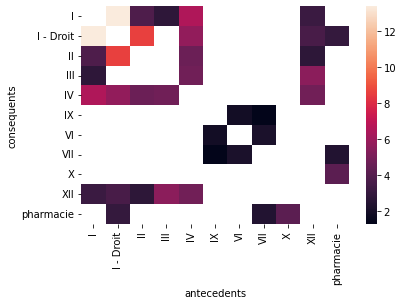

In [24]:
#filter rules with lift > 1
rules_ = rules_.query("lift>1")
#create support table based on lift values > 1
support_table = rules_.pivot(index='consequents', columns='antecedents',
values='lift')




sns.heatmap(support_table)

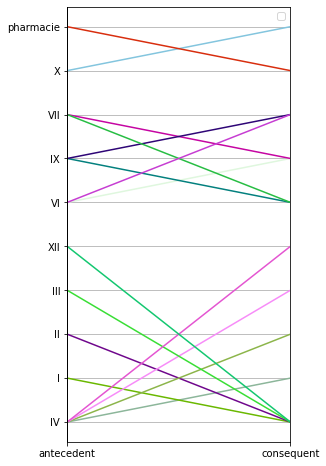

In [25]:
# Generate frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.01, use_colnames = True, max_len = 2)
# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.00)
# Generate coordinates and print example
coords = rules_to_coordinates(rules)
# Generate parallel coordinates plot

plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

 https://www.galaxie.enseignementsup-recherche.gouv.fr/ensup/pdf/qualification/sections.pdf
> LINK : Reference what I , II etc means
